In [1]:
from bia_bob import bob
bob.__version__

'0.3.0'

In [2]:
%%bob 
load c:/structure/data/blobs.tif,
normalize the image and 
use the stardist model "2D_versatile_fluo" to segment the nuclei in this image

The code will perform the following steps:
1. Load the image from the specified file path.
2. Normalize the image to enhance the contrast.
3. Use the stardist model "2D_versatile_fluo" to segment the nuclei in the normalized image.

Here is the code:

In [3]:
import numpy as np
from skimage.io import imread
from skimage import exposure
from stardist.models import StarDist2D

# Step 1: Load the image
filename = "c:/structure/data/blobs.tif"
image = imread(filename)

# Step 2: Normalize the image
image_normalized = exposure.rescale_intensity(image, out_range=(0, 1))

# Step 3: Segment the nuclei using stardist model
model = StarDist2D.from_pretrained('2D_versatile_fluo')
nuclei_labels, _ = model.predict_instances(image_normalized)

# Display the original image and the segmented nuclei
import stackview
stackview.curtain(image, nuclei_labels)

Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
1/1 [==============================] - 0s 184ms/step


StackViewNDArray([[ 0,  0,  0, ...,  0,  0,  0],
                  [ 0,  0,  0, ..., 52, 52,  0],
                  [ 0,  0,  0, ..., 52, 52,  0],
                  ...,
                  [ 0,  0,  0, ...,  0,  0,  0],
                  [ 0,  0,  0, ...,  0,  0,  0],
                  [ 0,  0,  0, ...,  0,  0,  0]])
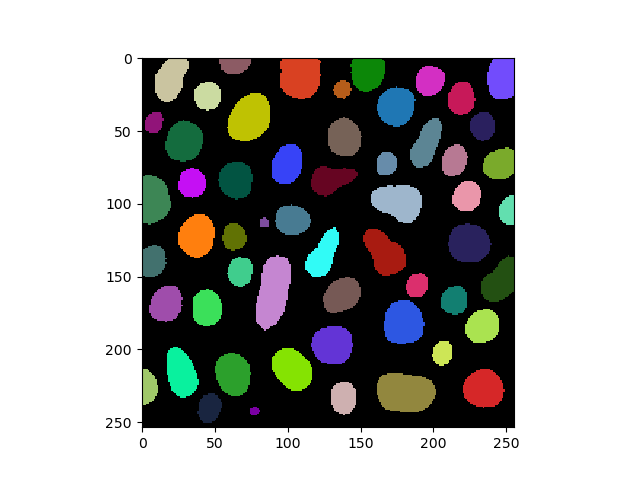

In [5]:
stackview.insight(nuclei_labels)